In [196]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression

In [197]:
cars_df = pd.read_csv("cars-dataset.csv")


In [198]:
cars_df.shape

(398, 8)

In [199]:
#EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

In [200]:
cars_df.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [201]:
#check for missing values
cars_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
car name,398,305,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cyl,398,NaN,NaN,NaN,5.45477,1.701,3,4,4,8,8
disp,398,NaN,NaN,NaN,193.426,104.27,68,104.25,148.5,262,455
hp,398,94,150,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wt,398,NaN,NaN,NaN,2970.42,846.842,1613,2223.75,2803.5,3608,5140
acc,398,NaN,NaN,NaN,15.5681,2.75769,8,13.825,15.5,17.175,24.8
yr,398,NaN,NaN,NaN,76.0101,3.69763,70,73,76,79,82
mpg,398,NaN,NaN,NaN,23.5146,7.81598,9,17.5,23,29,46.6


In [202]:
#As you can see from the above descriptive stats table , we can see that there are around 22 records with hp=150 . 
#so replace the "?" values in hp with 150 as it is the top value with highest frequency

In [203]:
cars_df['hp']=cars_df['hp'].replace('?','150')

In [204]:
Imputed_cars_df=cars_df.astype({'hp': 'float64'})

In [205]:
Imputed_cars_df.dtypes

car name     object
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [206]:
Imputed_cars_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,105.155779,38.600986,46.0,76.000,95.0,130.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [207]:
#Remove the column name as it is not needed for mpg calculation and also for clustering

In [208]:
Imputed_cars_df.drop('car name',axis =1 , inplace=True)

In [209]:
#Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

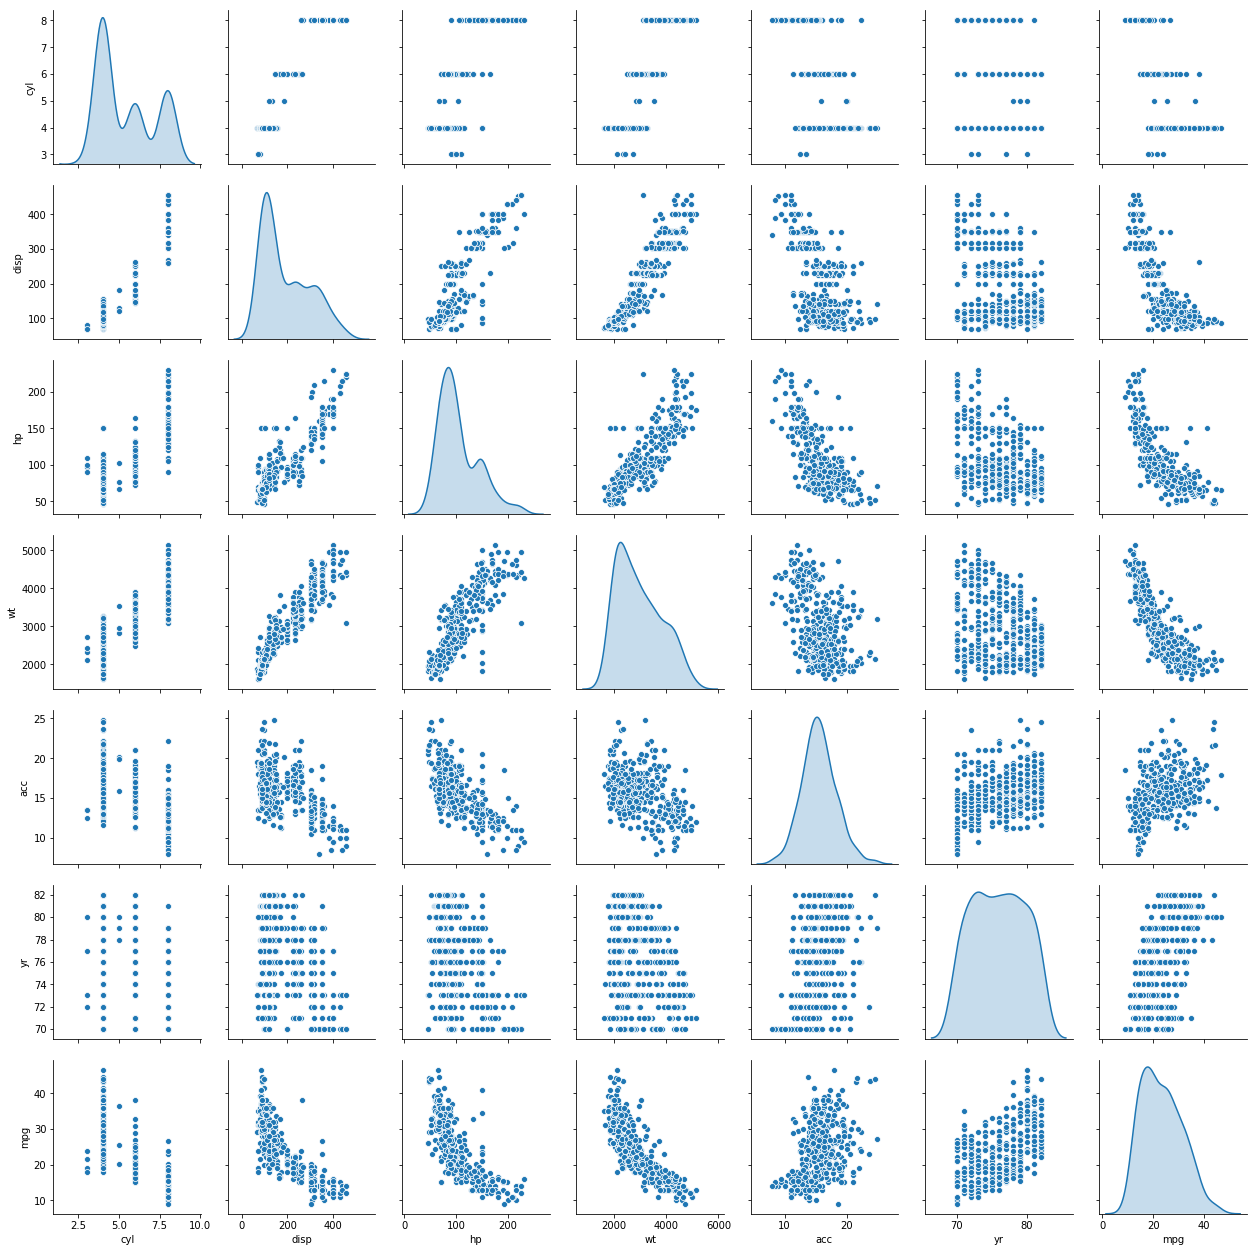

In [210]:
sns.pairplot(Imputed_cars_df,diag_kind='kde')

In [211]:
#From the above pair plot , if we observe the diagnol plots, 
#for cyl column , we can see that there are three peaks in the density curve , which suggests it has 3 modes and probably centering around 3 clusters
#Even for disp column, we can see two little spikes in the density curver, probably even this might be centering around 3 clusters
#Even there is one little spike in hp column as well , most probably even this might be centering arounf 3 clusters
#Except acc the rest of the columns has one little spike apart from the mode value , most probably thes columns might be centering around 2 clusters
#ACC columns looks like a clean gaussian curve with only one spike
#The columns disp,hp,wt,mpg are little positively skewed , as there is a little tail on the right side . It might indicate the presence of outliers.

In [212]:
#check the correlation among difference variables

In [213]:
Imputed_cars_df.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950721,0.818454,0.896017,-0.505419,-0.348746,-0.775396
disp,0.950721,1.000000,0.873330,0.932824,-0.543684,-0.370164,-0.804203
hp,0.818454,0.873330,1.000000,0.841770,-0.665833,-0.397772,-0.753177
wt,0.896017,0.932824,0.841770,1.000000,-0.417457,-0.306564,-0.831741
acc,-0.505419,-0.543684,-0.665833,-0.417457,1.000000,0.288137,0.420289
yr,-0.348746,-0.370164,-0.397772,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.753177,-0.831741,0.420289,0.579267,1.000000


In [214]:
#All the variables are correlated with each other.
#Kmeans clustering algorithm does not take correlation into consideration as it just measures the distance between the two varaibles

In [215]:
#Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points

In [216]:
#Here MPG is the dependent variable and we will not consider that column for clustering 

In [217]:
#Standardizing the data is the must KMeans completely depends on distance calculation

In [218]:

from scipy.stats import zscore

In [219]:
scaled_df=Imputed_cars_df.drop('mpg',axis=1).apply(zscore)

In [220]:
scaled_df.head()

,cyl,disp,hp,wt,acc,yr
0,1.498191,1.090604,0.644426,0.630870,-1.295498,-1.627426
1,1.498191,1.503514,1.552280,0.854333,-1.477038,-1.627426
2,1.498191,1.196232,1.163200,0.550470,-1.658577,-1.627426
3,1.498191,1.061796,1.163200,0.546923,-1.295498,-1.627426
4,1.498191,1.042591,0.903813,0.565841,-1.840117,-1.627426


In [221]:
#Initial a list to track SSE for KMeans with different K
sse_df = pd.DataFrame(columns=['K','SSE'])

for i in range(2,11):
    
    #Initialize KMeans
    km = KMeans(n_clusters=i, n_init=10, max_iter=300,random_state=1)
    
    #Fit on the data
    km.fit(scaled_df)
    
    #Add cluster information for each record in dataframe
    scaled_df['k_' + str(i)] = km.predict(scaled_df)
    
    #Track K and SSE information in sse_df
    sse_df.loc[sse_df.shape[0]] = [i, km.inertia_]

In [222]:
sse_df

,K,SSE
0,2.0,1082.564604
1,3.0,830.880327
2,4.0,665.450505
3,5.0,599.869370
4,6.0,538.406626
5,7.0,487.840689
6,8.0,437.298287
7,9.0,402.534198
8,10.0,374.873183


In [223]:
#conduct the elbow test to find the optimal number of clusters

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

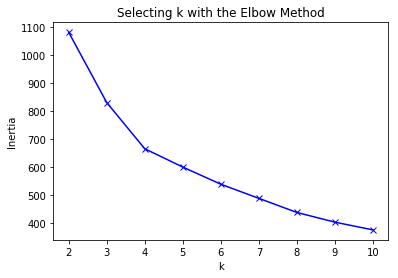

In [224]:
plt.plot(sse_df['K'],sse_df['SSE'],'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Selecting k with the Elbow Method')


In [225]:
#From the above plot , the bend is not coming clearly as there are many bends
#Looks like 4 clusters are the optimal number here

In [226]:
#lets look at the distribution of the data with 4 clusters

In [227]:
Imputed_cars_df['labels']=scaled_df['k_4']

In [228]:
Imputed_cars_df.groupby(["labels"]).count()

,cyl,disp,hp,wt,acc,yr,mpg
labels,,,,,,,
0,91,91,91,91,91,91,91
1,121,121,121,121,121,121,121
2,97,97,97,97,97,97,97
3,89,89,89,89,89,89,89


In [229]:
Imputed_cars_df.head()

,cyl,disp,hp,wt,acc,yr,mpg,labels
0,8,307.0,130.0,3504,12.0,70,18.0,2
1,8,350.0,165.0,3693,11.5,70,15.0,2
2,8,318.0,150.0,3436,11.0,70,18.0,2
3,8,304.0,150.0,3433,12.0,70,16.0,2
4,8,302.0,140.0,3449,10.5,70,17.0,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002683051B588>,
      dtype=object)

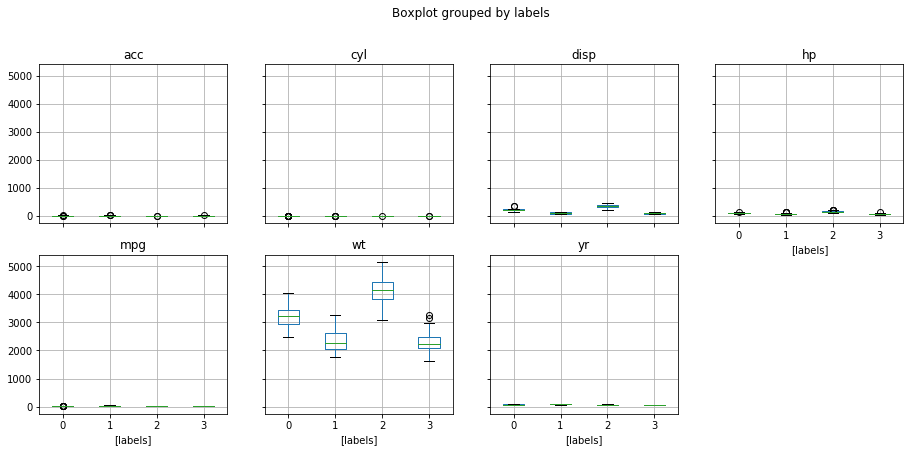

In [230]:
Imputed_cars_df.boxplot(by = 'labels',  layout=(3,4), figsize=(15, 10))

In [231]:
#From the above box plot , we can see that te distribution is tight and there are no outliers as well.

In [232]:
#Lets look at the distribution with 3 clusters

In [233]:
Imputed_cars_df['labels_3']=scaled_df['k_3']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026830E4A4E0>,
      dtype=object)

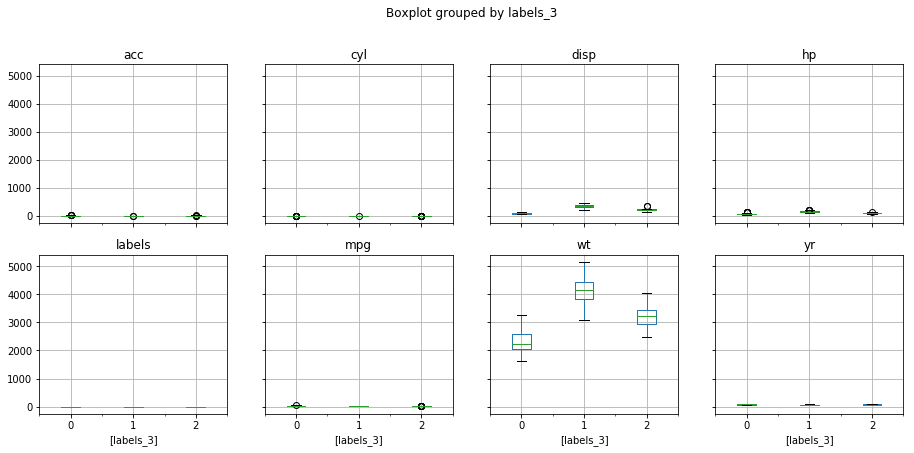

In [234]:
Imputed_cars_df.boxplot(by = 'labels_3',  layout=(3,4), figsize=(15, 10))

In [235]:
#If you look at the distribution of disp and wt columns , even with 4 clusters , the distribution is tight. so we can consider 4 as an optimal number 

In [236]:
Imputed_cars_df.drop('labels_3',axis=1,inplace=True)

In [237]:
#create the dendogram and  find the cophent index

In [238]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [239]:

Z = linkage(scaled_df, 'average')
c, coph_dists = cophenet(Z , pdist(scaled_df))
c

0.8938872335655469

In [240]:
#the copehenet index is little close to 1, so the clustering is better here.

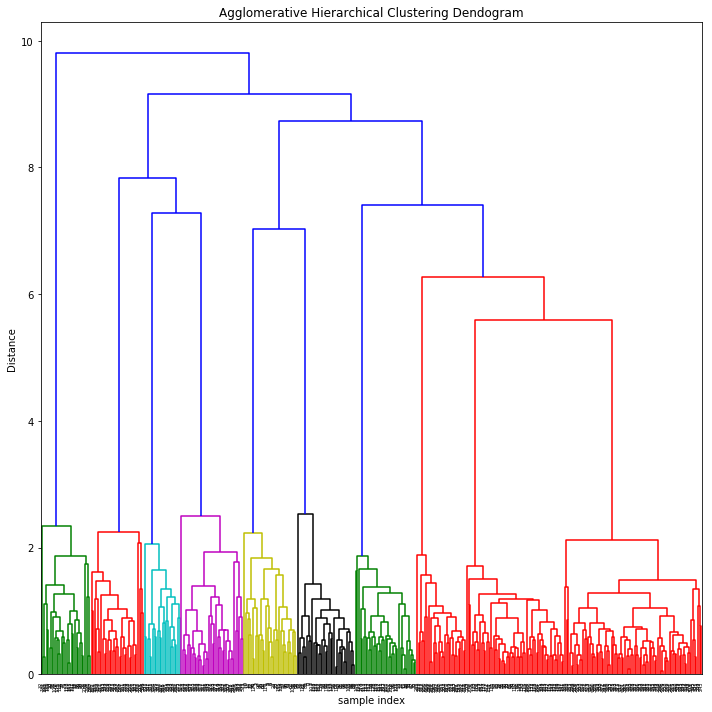

In [241]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z)
plt.tight_layout()

In [242]:
#Divide the data frame into 4 parts to run the  linear regression

In [243]:
Imputed_cars_df.head()

,cyl,disp,hp,wt,acc,yr,mpg,labels
0,8,307.0,130.0,3504,12.0,70,18.0,2
1,8,350.0,165.0,3693,11.5,70,15.0,2
2,8,318.0,150.0,3436,11.0,70,18.0,2
3,8,304.0,150.0,3433,12.0,70,16.0,2
4,8,302.0,140.0,3449,10.5,70,17.0,2


In [244]:
Cluster_0_df=Imputed_cars_df[Imputed_cars_df['labels']==0]

In [245]:
Cluster_1_df=Imputed_cars_df[Imputed_cars_df['labels']==1]

In [246]:
Cluster_2_df=Imputed_cars_df[Imputed_cars_df['labels']==2]

In [247]:
Cluster_3_df=Imputed_cars_df[Imputed_cars_df['labels']==3]

In [248]:
Cluster_0_df.shape

(91, 8)

In [249]:
Cluster_1_df.shape

(121, 8)

In [250]:
Cluster_2_df.shape

(97, 8)

In [251]:
Cluster_3_df.shape

(89, 8)

In [252]:
#Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [253]:
#Predict mpg on different clusters

In [254]:
X=Cluster_0_df.drop(['mpg','labels'],axis=1)

In [255]:
y=Cluster_0_df['mpg']

In [256]:
#Divide the train and test set in the ratio 80 20 respectively

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [258]:
regression_model_0 = LinearRegression()
regression_model_0.fit(X_train, y_train)
print('Score is {}'.format(regression_model_0.score(X_test, y_test)))

Score is -0.7190562052452907


In [259]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_0.coef_[()][idx]))

The coefficient for cyl is 0.8792689754422552
The coefficient for disp is 0.007427772357587502
The coefficient for hp is -0.024132292339218552
The coefficient for wt is -0.006090678402759273
The coefficient for acc is -0.16000193566917267
The coefficient for yr is 0.7986713211836346


In [260]:
X=Cluster_1_df.drop(['mpg','labels'],axis=1)
y=Cluster_1_df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
regression_model_1 = LinearRegression()
regression_model_1.fit(X_train, y_train)
print('Score is {}'.format(regression_model_1.score(X_test, y_test)))
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_1.coef_[()][idx]))

Score is 0.3719515067396766
The coefficient for cyl is 0.8978069641446064
The coefficient for disp is -0.009324156764573457
The coefficient for hp is -0.024715372611851638
The coefficient for wt is -0.010690226131650632
The coefficient for acc is 0.6180082434752988
The coefficient for yr is 0.9788703542856406


In [261]:
X=Cluster_2_df.drop(['mpg','labels'],axis=1)
y=Cluster_2_df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
regression_model_2 = LinearRegression()
regression_model_2.fit(X_train, y_train)
print('Score is {}'.format(regression_model_2.score(X_test, y_test)))
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_2.coef_[()][idx]))

Score is 0.33607198573207564
The coefficient for cyl is -0.6180937834634832
The coefficient for disp is 0.0017063670515407353
The coefficient for hp is -0.028595894837780744
The coefficient for wt is -0.0013859750198593507
The coefficient for acc is -0.4087907055275058
The coefficient for yr is 0.36730224793488025


In [262]:
X=Cluster_3_df.drop(['mpg','labels'],axis=1)
y=Cluster_3_df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
regression_model_3 = LinearRegression()
regression_model_3.fit(X_train, y_train)
print('Score is {}'.format(regression_model_3.score(X_test, y_test)))
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_3.coef_[()][idx]))

Score is 0.8314061531811251
The coefficient for cyl is 8.819724703530012
The coefficient for disp is -0.057529123220366275
The coefficient for hp is -0.034921612344419053
The coefficient for wt is -0.005380817145981959
The coefficient for acc is -0.376371474005127
The coefficient for yr is 0.25448350349415333
